In [1]:
genre_mapping = {
    "드라마": 1 << 43,
    "첩보": 1 << 42,
    "옴니버스": 1 << 41,
    "뮤직": 1 << 40,
    "동성애": 1 << 39,
    "로드무비": 1 << 38,
    "아동": 1 << 37,
    "하이틴(고교)": 1 << 36,
    "전기": 1 << 35,
    "청춘영화": 1 << 34,
    "재난": 1 << 33,
    "문예": 1 << 32,
    "연쇄극": 1 << 31,
    "신파": 1 << 30,
    "활극": 1 << 29,
    "반공/분단": 1 << 28,
    "군사": 1 << 27,
    "계몽": 1 << 26,
    "사회물(경향)": 1 << 25,
    "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23,
    "종교": 1 << 22,
    "무협": 1 << 21,
    "미스터리": 1 << 20,
    "SF": 1 << 19,
    "코메디": 1 << 18,
    "느와르": 1 << 17,
    "액션": 1 << 16,
    "범죄": 1 << 15,
    "어드벤처": 1 << 14,
    "가족": 1 << 13,
    "에로": 1 << 12,
    "멜로/로맨스": 1 << 11,
    '멜로드라마': 1 << 11,
    "공포": 1 << 10,
    "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8,
    '실험': 1 << 7,
    '스릴러': 1 << 5,
    '서부': 1 << 4,
    '전쟁': 1 << 3,
    '갱스터': 1 << 2,
    '판타지': 1 << 1,
    '해양액션': 1 << 0
}

def titleList(fileName : str):
    
    movieNum = int(fileName.split('_')[1].split('.')[0]) #int(movie)
    titleListGenre = []
    for k, v in genre_mapping.items():
        titleListGenre.append(1 if v & movieNum else 0)
        
    return titleListGenre

titleList('자마_8796093022208.jpg')

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [2]:
import numpy as np
from sklearn.decomposition import PCA

# 주어진 genre_mapping
genre_mapping = {
    "드라마": 1 << 43, "첩보": 1 << 42, "옴니버스": 1 << 41, "뮤직": 1 << 40,
    "동성애": 1 << 39, "로드무비": 1 << 38, "아동": 1 << 37, "하이틴(고교)": 1 << 36,
    "전기": 1 << 35, "청춘영화": 1 << 34, "재난": 1 << 33, "문예": 1 << 32,
    "연쇄극": 1 << 31, "신파": 1 << 30, "활극": 1 << 29, "반공/분단": 1 << 28,
    "군사": 1 << 27, "계몽": 1 << 26, "사회물(경향)": 1 << 25, "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23, "종교": 1 << 22, "무협": 1 << 21, "미스터리": 1 << 20,
    "SF": 1 << 19, "코메디": 1 << 18, "느와르": 1 << 17, "액션": 1 << 16,
    "범죄": 1 << 15, "어드벤처": 1 << 14, "가족": 1 << 13, "에로": 1 << 12,
    "멜로/로맨스": 1 << 11, '멜로드라마': 1 << 11, "공포": 1 << 10, "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8, '실험': 1 << 7, '스릴러': 1 << 5, '서부': 1 << 4,
    '전쟁': 1 << 3, '갱스터': 1 << 2, '판타지': 1 << 1, '해양액션': 1 << 0
}

# 제목 파일로부터 이진 벡터 생성
def titleList(fileName: str):
    movieNum = int(fileName.split('_')[1].split('.')[0])  # int(movie)
    titleListGenre = []
    for k, v in genre_mapping.items():
        titleListGenre.append(1 if v & movieNum else 0)
    return titleListGenre

# 예시 파일명으로 장르 벡터 생성
genre_vector = titleList('자마_8796093022208.jpg')
genre_vector = np.array(genre_vector).reshape(1, -1)  # 2D 배열로 변환 (1 x 43)
print("원래 차원의 벡터: ", genre_vector.shape)

# PCA 차원 축소
# pca = PCA(n_components=8)
pca = PCA(n_components=min(genre_vector.shape[1], 1))
genre_vector_pca = pca.fit_transform(genre_vector)

print("원래 차원의 벡터: ", genre_vector.shape)
print("차원 축소된 벡터: ", genre_vector_pca.shape)
print(genre_vector_pca)

# 네, (1, 44)의 원래 차원을 가지고 있는 경우,
# 차원을 10개로 줄이기엔 충분하지 않습니다.
# PCA는 입력 데이터의 샘플 수(n_samples)보다 더 많은 차원(n_components)을 가질 수 없기 때문입니다.
# 즉, 차원을 10개로 줄이기 위해서는 샘플 수가 10개 이상이어야 합니다.
# 현재 (1, 44)에서 샘플 수는 1개이고 피처 수는 44개입니다.
# 이 경우, 차원 수는 최소 1로만 줄일 수 있으며, 차원을 10개로 줄이려면 샘플 수를 늘려야 합니다.

원래 차원의 벡터:  (1, 44)
원래 차원의 벡터:  (1, 44)
차원 축소된 벡터:  (1, 1)
[[0.]]


c:\ProgramData\anaconda3\envs\cvmaster\Lib\site-packages\sklearn\decomposition\_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


In [3]:
import os
from collections import Counter

# genre_mapping은 기존에 제공된 딕셔너리와 동일
genre_mapping = {
    "드라마": 1 << 43, "첩보": 1 << 42, "옴니버스": 1 << 41, "뮤직": 1 << 40,
    "동성애": 1 << 39, "로드무비": 1 << 38, "아동": 1 << 37, "하이틴(고교)": 1 << 36,
    "전기": 1 << 35, "청춘영화": 1 << 34, "재난": 1 << 33, "문예": 1 << 32,
    "연쇄극": 1 << 31, "신파": 1 << 30, "활극": 1 << 29, "반공/분단": 1 << 28,
    "군사": 1 << 27, "계몽": 1 << 26, "사회물(경향)": 1 << 25, "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23, "종교": 1 << 22, "무협": 1 << 21, "미스터리": 1 << 20,
    "SF": 1 << 19, "코메디": 1 << 18, "느와르": 1 << 17, "액션": 1 << 16,
    "범죄": 1 << 15, "어드벤처": 1 << 14, "가족": 1 << 13, "에로": 1 << 12,
    "멜로/로맨스": 1 << 11, "멜로드라마": 1 << 11, "공포": 1 << 10, "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8, "실험": 1 << 7, "스릴러": 1 << 5, "서부": 1 << 4,
    "전쟁": 1 << 3, "갱스터": 1 << 2, "판타지": 1 << 1, "해양액션": 1 << 0
}

# 장르 빈도수를 저장하기 위한 Counter
genre_counter = Counter()

# 파일명이 저장된 폴더 경로
image_folder = r'G:\내 드라이브\project_poster\x_train'

# 장르별 빈도수를 계산하는 함수
def count_genres_from_files(image_folder):
    # 폴더 내 파일을 순회하며
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):
            # 각 파일명에서 비트 플래그 추출
            movieNum = int(filename.split('_')[1].split('.')[0])
            
            # genre_mapping을 활용하여 장르 빈도수 카운트
            for genre, bitmask in genre_mapping.items():
                if movieNum & bitmask:
                    genre_counter[genre] += 1

# 장르 빈도수 세기 실행
count_genres_from_files(image_folder)

# 결과 출력
print("장르별 빈도수:")
for genre, count in sorted(genre_counter.items(),
                           key=lambda x:x[1],
                           reverse=True):
    print(f"\"{genre}\": {count},")

장르별 빈도수:
"드라마": 3521,
"코메디": 923,
"멜로/로맨스": 862,
"멜로드라마": 862,
"액션": 812,
"스릴러": 811,
"판타지": 435,
"범죄": 399,
"어드벤처": 378,
"가족": 372,
"미스터리": 364,
"공포": 352,
"SF": 284,
"에로": 212,
"시대극/사극": 92,
"전쟁": 90,
"옴니버스": 79,
"아동": 71,
"뮤직": 68,
"뮤지컬": 58,
"스포츠": 48,
"느와르": 46,
"청춘영화": 44,
"동성애": 30,
"전기": 22,
"로드무비": 22,
"하이틴(고교)": 21,
"사회물(경향)": 17,
"무협": 17,
"실험": 16,
"재난": 13,
"종교": 11,
"서부": 7,
"갱스터": 5,
"반공/분단": 5,
"첩보": 4,
"활극": 3,
"해양액션": 1,
"계몽": 1,
"군사": 1,
"문예": 1,
"신파": 1,


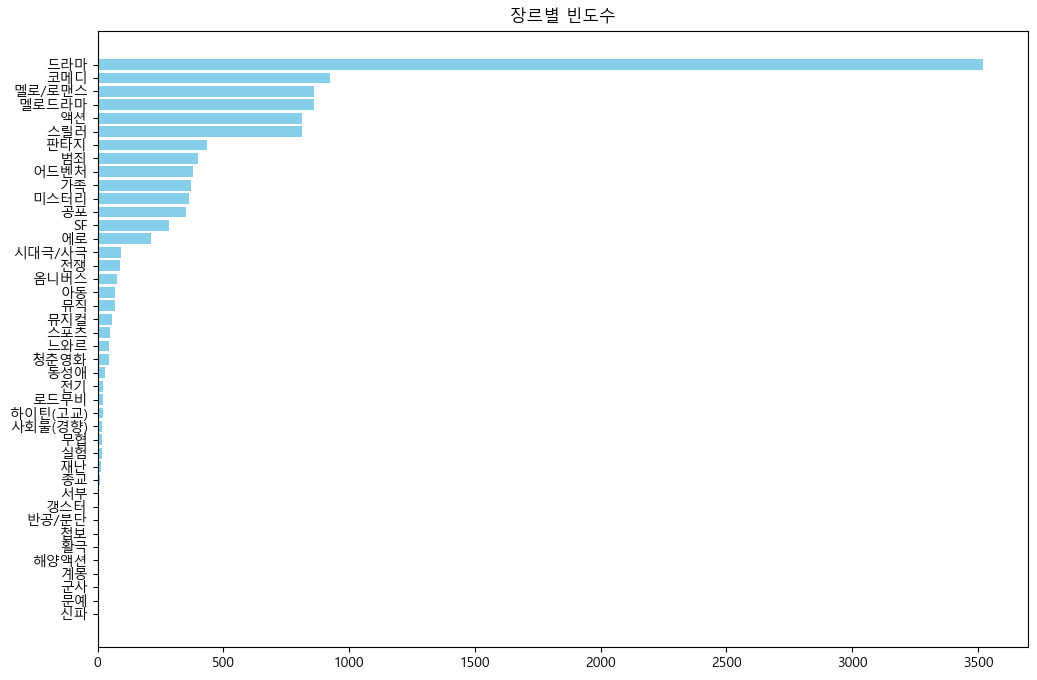

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 장르별 빈도수
genre_counts = {
"드라마": 3521,
"코메디": 923,
"멜로/로맨스": 862,
"멜로드라마": 862,
"액션": 812,
"스릴러": 811,
"판타지": 435,
"범죄": 399,
"어드벤처": 378,
"가족": 372,
"미스터리": 364,
"공포": 352,
"SF": 284,
"에로": 212,
"시대극/사극": 92,
"전쟁": 90,
"옴니버스": 79,
"아동": 71,
"뮤직": 68,
"뮤지컬": 58,
"스포츠": 48,
"느와르": 46,
"청춘영화": 44,
"동성애": 30,
"전기": 22,
"로드무비": 22,
"하이틴(고교)": 21,
"사회물(경향)": 17,
"무협": 17,
"실험": 16,
"재난": 13,
"종교": 11,
"서부": 7,
"갱스터": 5,
"반공/분단": 5,
"첩보": 4,
"활극": 3,
"해양액션": 1,
"계몽": 1,
"군사": 1,
"문예": 1,
"신파": 1
}

# C:\Windows\Fonts
font_path = r'C:\ex\prj_poster\MALGUN.TTF'
font_name = fm.FontProperties(fname=font_path).get_name()

# 장르와 빈도수 리스트로 변환
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# 막대그래프 생성
plt.figure(figsize=(12, 8))
plt.rc('font', family=font_name)
plt.barh(genres, counts, color='skyblue')
# plt.xlabel('빈도수')
# plt.ylabel('장르')
plt.title('장르별 빈도수')
plt.gca().invert_yaxis()  # y축 역전
plt.show()

In [5]:
# # 장르 통합 매핑
# resized_genre_mapping = {
#     "드라마": ["드라마", "청춘영화", "아동", "사회물(경향)",'가족', '하이틴(고교)','로드무비'],
#     "코메디": ["코메디"],
#     '로맨스': ['멜로/로맨스', '멜로드라마', '에로','동성애'],
#     "액션": ["액션", "재난", "범죄", "느와르",
#            '활극','첩보','해양액션', "서부", "갱스터", '무협'],
#     "SF/판타지": ["SF", "판타지", "어드벤처"],
#     "공포": ["공포", "스릴러", "미스터리"],
#     "전쟁": ["전쟁", "군사",'반공/분단'],
#     "뮤직": ["뮤지컬", "뮤직"],
#     '시대극': ['시대극/사극','전기'],
#     "기타": ["옴니버스", "종교", "실험",'스포츠', '계몽', '문예', '신파']
# }

# # 새로운 장르 빈도수 계산
# new_genre_counter = {key: 0 for key in genre_mapping.keys()}

# for new_genre, old_genres in genre_mapping.items():
#     for old_genre in old_genres:
#         if old_genre in genre_counter:
#             new_genre_counter[new_genre] += genre_counter[old_genre]

# # 결과 출력
# print("통합된 장르별 빈도수:")
# for genre, count in new_genre_counter.items():
#     print(f"{genre}: {count}")

In [12]:
# 여기부터 통합 장르 편집

In [6]:
resized_genre_mapping = {
    "드라마": ["드라마", "청춘영화", "아동", "사회물(경향)",'가족', '하이틴(고교)','로드무비'],
    "코메디": ["코메디"],
    '로맨스': ['멜로/로맨스', '멜로드라마', '에로','동성애'],
    "액션": ["액션", "재난", "범죄", "느와르",
           '활극','첩보','해양액션', "서부", "갱스터", '무협'],
    "SF/판타지": ["SF", "판타지", "어드벤처"],
    "공포": ["공포", "스릴러", "미스터리"],
    "전쟁": ["전쟁", "군사",'반공/분단'],
    "뮤직": ["뮤지컬", "뮤직"],
    '시대극': ['시대극/사극','전기'],
    "기타": ["옴니버스", "종교", "실험",'스포츠', '계몽', '문예', '신파']
}

list1=[]

for k, v in resized_genre_mapping.items():
    for i in v:
        # print(i)
        list1.append(i)
        
print(len(list1))

42


In [7]:
# 묶음 장르 빈도수 계산
final_counts = {}

# 각 묶음 장르에 대한 최종 빈도수 계산
for group, genres in resized_genre_mapping.items():
    total_count = sum(genre_counts.get(genre, 0) for genre in genres)  # 해당 장르의 빈도수를 합산
    final_counts[group] = total_count

# 최종 결과 출력
print("묶음 장르 총합 빈도수:")
for group, count in sorted(final_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"\"{group}\": {count},")

묶음 장르 총합 빈도수:
"드라마": 4068,
"로맨스": 1966,
"공포": 1527,
"액션": 1307,
"SF/판타지": 1097,
"코메디": 923,
"기타": 157,
"뮤직": 126,
"시대극": 114,
"전쟁": 96,


In [8]:
final_counts

{'드라마': 4068,
 '코메디': 923,
 '로맨스': 1966,
 '액션': 1307,
 'SF/판타지': 1097,
 '공포': 1527,
 '전쟁': 96,
 '뮤직': 126,
 '시대극': 114,
 '기타': 157}

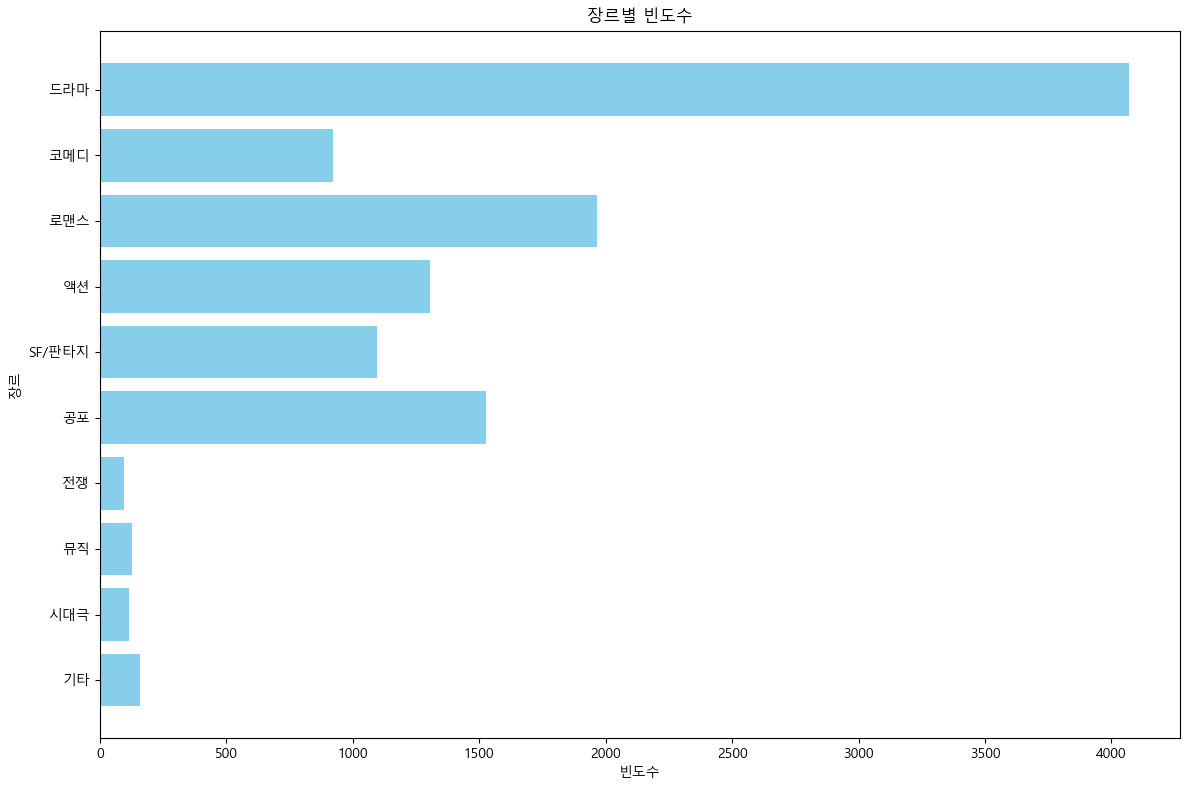

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = r'C:\ex\prj_poster\MALGUN.TTF'  # 사용자 정의 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()

# 장르와 빈도수 리스트로 변환
genres2 = list(final_counts.keys())
counts2 = list(final_counts.values())

# 막대그래프 생성
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
plt.rc('font', family=font_name)  # 사용자 정의 폰트 적용
plt.barh(genres2, counts2, color='skyblue')  # 수평 막대 그래프

# 라벨 및 제목 설정
plt.xlabel('빈도수')
plt.ylabel('장르')
plt.title('장르별 빈도수')
plt.gca().invert_yaxis()  # y축 역전
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()  # 그래프 출력

# 전쟁을 액션으로
# 시대극을 기타로
# 뮤직을 기타로



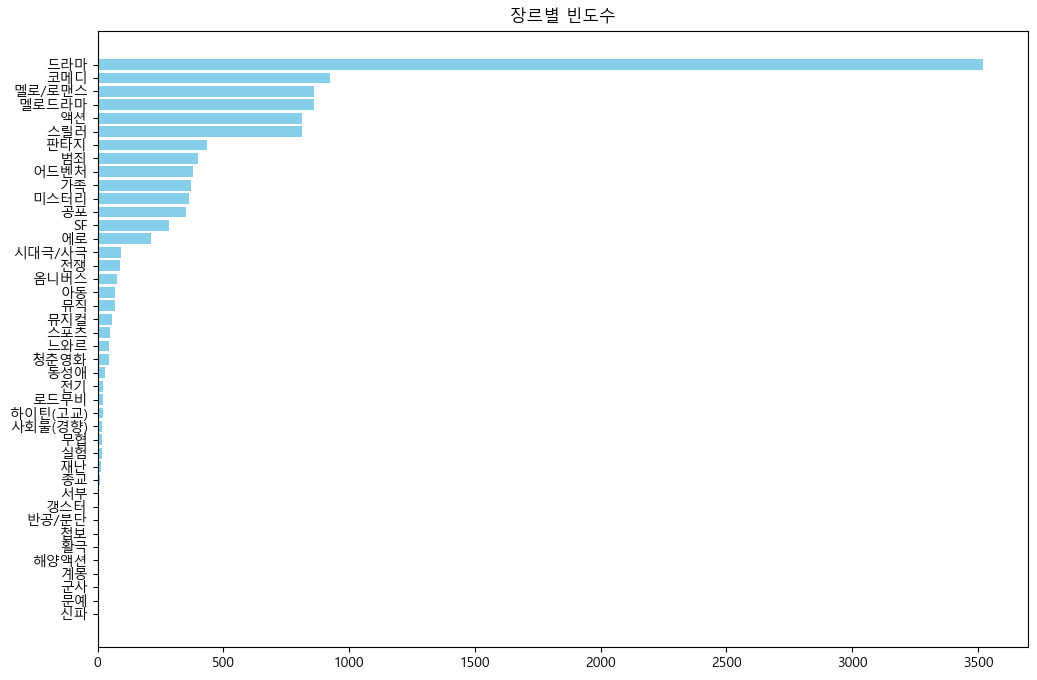

In [10]:
# C:\Windows\Fonts
font_path = r'C:\ex\prj_poster\MALGUN.TTF'
font_name = fm.FontProperties(fname=font_path).get_name()

# 장르와 빈도수 리스트로 변환
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# 막대그래프 생성
plt.figure(figsize=(12, 8))
plt.rc('font', family=font_name)
plt.barh(genres, counts, color='skyblue')
# plt.xlabel('빈도수')
# plt.ylabel('장르')
plt.title('장르별 빈도수')
plt.gca().invert_yaxis()  # y축 역전
plt.show()